In [ ]:
#匯入模組
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
import math

In [ ]:
#定義符號
t = smp.symbols('t',real=True)
the1, the2, the3 = smp.symbols(r'\theta_1 \theta_2 \theta_3',cls=smp.Function)

#角度
the1 = the1(t)
the2 = the2(t)
the3 = the3(t)

#角速度
the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)
the3_d = smp.diff(the3, t)

#角加速度
the1_dd = smp.diff(the1_d,t)
the2_dd = smp.diff(the2_d,t)
the3_dd = smp.diff(the3_d,t)

In [ ]:
#面積計算
length1 = 0.06432 #手臂長度
width1 = 0.03241 #手臂寬度
radius1 = 0.0175 #中心半徑
radius2 = 0.004 #磁鐵半徑
rectangle = length1*width1*3 #手臂面積
semicircle = math.pi*(width1/2)**2/2*3 #半圓面積
m = 0.02313 #指尖陀螺質量
m_rec = m*rectangle/(rectangle+semicircle)/3 #手臂質量
m_cir = m*semicircle/(rectangle+semicircle)/3 #半圓質量
m_bigmag = 0.00219 #大磁鐵質量
m_smamag = 0.000733 #小磁鐵質量
m_mag = m_bigmag*1+m_smamag*0 #磁鐵總質量
I_rec = (1/12*m_rec*(length1**2+width1**2)+m_rec*((length1/2)+radius1)**2)*3 #手臂轉動慣量
I_cir = (1/4*m_cir*(width1/2)**2+m_cir*(length1+radius1)**2)*3 #半圓轉動慣量
I_mag = (1/2*m_mag*radius2**2+m_mag*(length1+radius1)**2)*3 #磁鐵轉動慣量
I = I_rec+I_cir+I_mag #轉動慣量
I

0.0001258306960503294

In [ ]:
#變數
k = 2*math.pi/3  #指尖夾角

q1 = 143       #磁荷1
q2 = 143       #磁荷2
Q = q1*q2/10**7   #磁荷乘積
u = 0.222792703       #磁偶極矩
#一大:0.222792703
#一大一小:0.29718
#一大二小:0.36795
#一大三小:0.44027
#一大四小:0.51376
u0 = 4*math.pi/10**7 #真空磁導率
I

0.0001258306960503294

In [ ]:
#各指尖(磁鐵)位置
l = radius1+length1+width1/2
d = l*2+0.005       #指尖陀螺距離
x11 = l*smp.cos(the1)
y11 = l*smp.sin(the1)
x12 = l*smp.cos(the1+k)
y12 = l*smp.sin(the1+k)
x13 = l*smp.cos(the1-k)
y13 = l*smp.sin(the1-k)

x21 = d+l*smp.cos(the2)
y21 = l*smp.sin(the2)
x22 = d+l*smp.cos(the2+k)
y22 = l*smp.sin(the2+k)
x23 = d+l*smp.cos(the2-k)
y23 = l*smp.sin(the2-k)

x31 = d*2+l*smp.cos(the3)
y31 = l*smp.sin(the3)
x32 = d*2+l*smp.cos(the3+k)
y32 = l*smp.sin(the3+k)
x33 = d*2+l*smp.cos(the3-k)
y33 = l*smp.sin(the3-k)

#磁鐵倆倆距離
d1121 = ((x11-x21)**2+(y11-y21)**2)**0.5
d1122 = ((x11-x22)**2+(y11-y22)**2)**0.5
d1123 = ((x11-x23)**2+(y11-y23)**2)**0.5

d1221 = ((x12-x21)**2+(y12-y21)**2)**0.5
d1222 = ((x12-x22)**2+(y12-y22)**2)**0.5
d1223 = ((x12-x23)**2+(y12-y23)**2)**0.5

d1321 = ((x13-x21)**2+(y13-y21)**2)**0.5
d1322 = ((x13-x22)**2+(y13-y22)**2)**0.5
d1323 = ((x13-x23)**2+(y13-y23)**2)**0.5

d2131 = ((x21-x31)**2+(y21-y31)**2)**0.5
d2132 = ((x21-x32)**2+(y21-y32)**2)**0.5
d2133 = ((x21-x33)**2+(y21-y33)**2)**0.5

d2231 = ((x22-x31)**2+(y22-y31)**2)**0.5
d2232 = ((x22-x32)**2+(y22-y32)**2)**0.5
d2233 = ((x22-x33)**2+(y22-y33)**2)**0.5

d2331 = ((x23-x31)**2+(y23-y31)**2)**0.5
d2332 = ((x23-x32)**2+(y23-y32)**2)**0.5
d2333 = ((x23-x33)**2+(y23-y33)**2)**0.5

In [ ]:
#拉格朗日
K = I*(the1_d**2+the2_d**2+the3_d**2) #動能

#位能(磁偶極矩 與 磁場 內積)
V1121 = u0/4/math.pi*(3*d1121*(u*(d1121))/d1121**5-u/d1121**3)*(u)
V1122 = u0/4/math.pi*(3*d1122*(u*(d1122))/d1122**5-u/d1122**3)*(u)
V1123 = u0/4/math.pi*(3*d1123*(u*(d1123))/d1123**5-u/d1123**3)*(u)
V1221 = u0/4/math.pi*(3*d1221*(u*(d1221))/d1221**5-u/d1221**3)*(u)
V1222 = u0/4/math.pi*(3*d1222*(u*(d1222))/d1222**5-u/d1222**3)*(u)
V1223 = u0/4/math.pi*(3*d1223*(u*(d1223))/d1223**5-u/d1223**3)*(u)
V1321 = u0/4/math.pi*(3*d1321*(u*(d1321))/d1321**5-u/d1321**3)*(u)
V1322 = u0/4/math.pi*(3*d1322*(u*(d1322))/d1322**5-u/d1322**3)*(u)
V1323 = u0/4/math.pi*(3*d1323*(u*(d1323))/d1323**5-u/d1323**3)*(u)

V2131 = u0/4/math.pi*(3*d2131*(u*(d2131))/d2131**5-u/d2131**3)*(u)
V2132 = u0/4/math.pi*(3*d2132*(u*(d2132))/d2132**5-u/d2132**3)*(u)
V2133 = u0/4/math.pi*(3*d2133*(u*(d2133))/d2133**5-u/d2133**3)*(u)
V2231 = u0/4/math.pi*(3*d2231*(u*(d2231))/d2231**5-u/d2231**3)*(u)
V2232 = u0/4/math.pi*(3*d2232*(u*(d2232))/d2232**5-u/d2232**3)*(u)
V2233 = u0/4/math.pi*(3*d2233*(u*(d2233))/d2233**5-u/d2233**3)*(u)
V2331 = u0/4/math.pi*(3*d2331*(u*(d2331))/d2331**5-u/d2331**3)*(u)
V2332 = u0/4/math.pi*(3*d2332*(u*(d2332))/d2332**5-u/d2332**3)*(u)
V2333 = u0/4/math.pi*(3*d2333*(u*(d2333))/d2333**5-u/d2333**3)*(u)

#舊位能(簡化版、磁荷)
V_old = Q/d1121 + Q/d1122 + Q/d1123 + Q/d1221 + Q/d1222 + Q/d1223 + Q/d1321 + Q/d1322 + Q/d1323
#新位能(複雜版、磁場)
V_new = V1121+V1122+V1123+V1221+V1222+V1223+V1321+V1322+V1323+V2131+V2132+V2133+V2231+V2232+V2233+V2331+V2332+V2333

L = K-V_new #拉格朗日

In [ ]:
#微分、偏微分
LE2 = smp.diff(L,the2)-smp.diff((smp.diff(L,the2_d)),t)
LE2 = LE2.simplify()

In [ ]:
LE3 = smp.diff(L,the3)-smp.diff((smp.diff(L,the3_d)),t)
LE3 = LE3.simplify()

In [ ]:
#解微分方程
sols = smp.solve([LE2,LE3],(the2_dd,the3_dd),simplify=False,rational=False)

In [ ]:
#指尖陀螺1的運動方程
dz1dt_f = 0 #回傳角加速度=0
dthe1dt_f = smp.lambdify(the1_d,the1_d) #回傳角速度=角速度

#指尖陀螺2的運動方程
#dis2 = 0.05187 #消耗係數
dis2 = 0.5
#回傳角加速度=各種變數待入方程式-消耗項
dz2dt_f = smp.lambdify((the1,the2,the3,the1_d,the2_d,the3_d), sols[the2_dd]-2*the2_d*dis2)
dthe2dt_f = smp.lambdify(the2_d,the2_d) #回傳角速度=角速度

#指尖陀螺2的運動方程
#dis3 = 0.04527 #消耗係數
dis3 = 0.5
#回傳角加速度=各種變數待入方程式-消耗項
dz3dt_f = smp.lambdify((the1,the2,the3,the1_d,the2_d,the3_d), sols[the3_dd]-2*the3_d*dis3)
dthe3dt_f = smp.lambdify(the3_d,the3_d) #回傳角速度=角速度

In [ ]:
#定義會回傳[角度1、角度2、角速度1、角速度2]的函式
def dSdt(S,t):
  the1, the2, the3, z1, z2, z3 = S
  return [
      dthe1dt_f(z1),
      dthe2dt_f(z2),
      dthe3dt_f(z3),
      0,
      dz2dt_f(the1,the2,the3,z1,z2,z3),
      dz3dt_f(the1,the2,the3,z1,z2,z3),
  ]

In [ ]:
#跑數值解
time = 3 #總時長
dt = 0.01 #時間間隔
t = np.linspace(0,time,int(time/dt)) #內插建立時間表

#帶入初始條件[角度1、角度2、角速度1、角速度2]、回傳數值解結果
ans = odeint(dSdt,y0=[0,0,0,-30.23,30.23,-30.23],t=t)

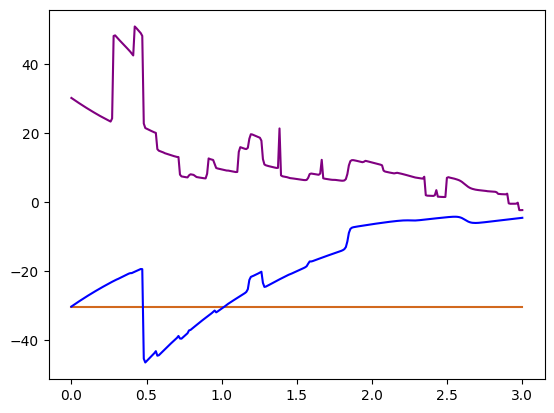

In [ ]:
#匯出數值解結果
r_the1 = ans.T[0]  #角度1數值解結果
r_the2 = ans.T[1]  #角度2數值解結果
r_the3 = ans.T[2]  #角度3數值解結果
r_the1_d = ans.T[3] #角速度1數值解結果
r_the2_d = ans.T[4] #角速度2數值解結果
r_the3_d = ans.T[5] #角速度3數值解結果

#畫圖
plt.plot(t,r_the1_d,color='chocolate')  #繪圖(x軸,y軸,顏色="?!")
plt.plot(t,r_the2_d,color='purple')  #繪圖(x軸,y軸,顏色="?!")
plt.plot(t,r_the3_d,color='blue')  #繪圖(x軸,y軸,顏色="?!")
plt.show() #秀出圖表

In [ ]:
#將數值解轉出txt檔
path = r"Numerical Solution.txt" #設定檔名
with open (path,'w') as f:
  f.write(str([d,width1,l,dt])+"\n") #第一格先寫變數
  for n in range(0,int(time/dt)-1):
    f.write(str([n/dt,r_the1[n],r_the2[n],r_the3[n],r_the1_d[n],r_the2_d[n],r_the3_d[n]])+"\n") #後續再逐格寫入數值解[時間、角度1、角度2、角速度1、角速度2]
f.close()